In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import auc
import numpy as np

In [9]:
cc=pd.read_csv('https://raw.githubusercontent.com/skathirmani/datasets/master/credit-default.csv')
cc_dummies=pd.get_dummies(cc)
cc.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_length,installment_rate,personal_status,other_debtors,...,property,age,installment_plan,housing,existing_credits,default,dependents,telephone,foreign_worker,job
0,< 0 DM,6,critical,radio/tv,1169,unknown,> 7 yrs,4,single male,none,...,real estate,67,none,own,2,1,1,yes,yes,skilled employee
1,1 - 200 DM,48,repaid,radio/tv,5951,< 100 DM,1 - 4 yrs,2,female,none,...,real estate,22,none,own,1,2,1,none,yes,skilled employee
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 yrs,2,single male,none,...,real estate,49,none,own,1,1,2,none,yes,unskilled resident
3,< 0 DM,42,repaid,furniture,7882,< 100 DM,4 - 7 yrs,2,single male,guarantor,...,building society savings,45,none,for free,1,1,2,none,yes,skilled employee
4,< 0 DM,24,delayed,car (new),4870,< 100 DM,1 - 4 yrs,3,single male,none,...,unknown/none,53,none,for free,2,2,2,none,yes,skilled employee


In [73]:
train,test=train_test_split(cc_dummies,test_size=0.3,random_state=100)
train_x=train.drop('default',axis=1)
train_y=train['default']
test_x=test.drop('default',axis=1)
test_y=test['default']

In [79]:
columns=['Decision Tree','Random Forest','AdaBoost','KNN','Naive Bayes']
index=['Accuracy','Sensitivity']
model_info=pd.DataFrame(columns=columns,index=index)
model_info

,Decision Tree,Random Forest,AdaBoost,KNN,Naive Bayes
Accuracy,NaN,NaN,NaN,NaN,NaN
Sensitivity,NaN,NaN,NaN,NaN,NaN


## GridSearchCV

In [36]:
from sklearn.model_selection import GridSearchCV
params = {'max_depth': list(range(1,30))}
base_estimator = DecisionTreeClassifier(random_state=100)
cv_model = GridSearchCV(base_estimator,
                       param_grid=params,
                       cv=10)
cv_model.fit(train_x, train_y)
cv_model.best_params_

{'max_depth': 4}

# Decision Tree

In [85]:
model_dt=DecisionTreeClassifier(random_state=100,max_depth=4)
model_dt.fit(train_x,train_y)
pred1=model_dt.predict(test_x)
TN,FP,FN,TP=confusion_matrix(test_y,pred1).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
print(accuracy)
senstivity=TP/(TP+FN)*100
print(senstivity)
dt=np.array([accuracy,senstivity])
for i in range(model_info.shape[0]):
    model_info['Decision Tree'].iloc[i]=dt[i]


69.66666666666667
39.50617283950617


### Decision Tree ROC

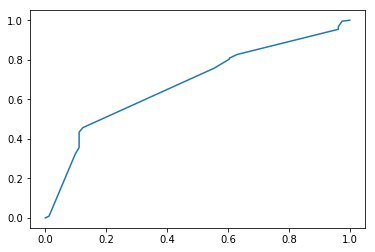

In [95]:
pred_probs_dt = pd.DataFrame(model_dt.predict_proba(test_x),columns=['Pos','Neg'])
fpr_dt, tpr_dt, thr_dt = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fpr_dt,tpr_dt)
plt.show()

# Random Forest

In [80]:
model_rf=RandomForestClassifier(random_state=100)
model_rf.fit(train_x,train_y)
pred2=model_rf.predict(test_x)
TN,FP,FN,TP=confusion_matrix(test_y,pred2).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
print(accuracy)
senstivity=TP/(TP+FN)*100
print(senstivity)
dt=np.array([accuracy,senstivity])
for i in range(model_info.shape[0]):
    model_info['Random Forest'].iloc[i]=dt[i]

76.0
34.5679012345679


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Random ROC

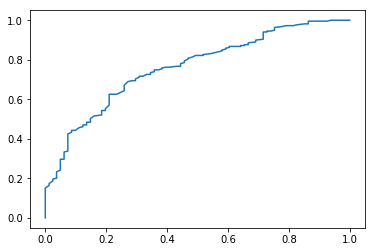

In [96]:
model_rf=RandomForestClassifier(random_state=100, n_estimators=300)
model_rf.fit(train_x,train_y)
pred_probs_rf=pd.DataFrame(model_rf.predict_proba(test_x),columns=['Pos','Neg'])
fpr_rf, tpr_rf,thr_rf,=roc_curve(test_y,pred_probs_rf['Pos'],pos_label=1)
plt.plot(fpr_rf,tpr_rf)
plt.show()

# KNN

In [81]:
model_knn=KNeighborsClassifier(n_neighbors=4)
model_knn.fit(train_x,train_y)
pred3=model_knn.predict(test_x)
TN,FP,FN,TP=confusion_matrix(test_y,pred3).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
print(accuracy)
senstivity=TP/(TP+FN)*100
print(senstivity)
dt=np.array([accuracy,senstivity])
for i in range(model_info.shape[0]):
    model_info['KNN'].iloc[i]=dt[i]

70.66666666666667
13.580246913580247


### KNN ROC

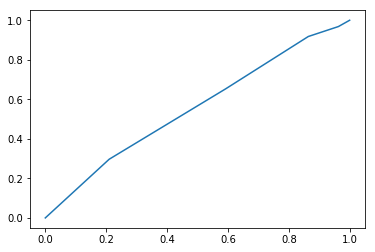

In [97]:
pred_probs_dt = pd.DataFrame(model_knn.predict_proba(test_x),columns=['Pos','Neg'])
fpr_kn, tpr_kn, thr_kn = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fpr_kn,tpr_kn)
plt.show()

# Adaboost

In [82]:
model_ab=AdaBoostClassifier(random_state=100)
model_ab.fit(train_x,train_y)
pred4=model_ab.predict(test_x)
TN,FP,FN,TP=confusion_matrix(test_y,pred4).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
print(accuracy)
senstivity=TP/(TP+FN)*100
print(senstivity)
dt=np.array([accuracy,senstivity])
for i in range(model_info.shape[0]):
    model_info['AdaBoost'].iloc[i]=dt[i]

73.33333333333333
46.913580246913575


### Adabost ROC

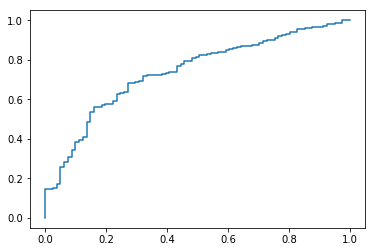

In [98]:
pred_probs_dt = pd.DataFrame(model_ab.predict_proba(test_x),columns=['Pos','Neg'])
fpr_ab, tpr_ab, thr_ab = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fpr_ab,tpr_ab)
plt.show()

# Naive Bayes

In [83]:
gnb=GaussianNB()
Gaussian_model=gnb.fit(train_x,train_y)
pred4=Gaussian_model.predict(test_x)
TN,FP,FN,TP=confusion_matrix(test_y,pred4).ravel()
accuracy=(TP+TN)/(TP+TN+FP+FN)*100
print(accuracy)
senstivity=TP/(TP+FN)*100
print(senstivity)
dt=np.array([accuracy,senstivity])
for i in range(model_info.shape[0]):
    model_info['Naive Bayes'].iloc[i]=dt[i]

68.33333333333333
54.32098765432099


### Gaussian ROC

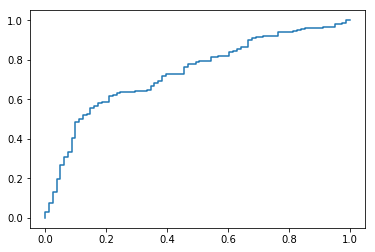

In [99]:
pred_probs_dt = pd.DataFrame(Gaussian_model.predict_proba(test_x),columns=['Pos','Neg'])
fpr_nb, tpr_nb, thr_nb = roc_curve(test_y,pred_probs_dt['Pos'],pos_label=1)
plt.plot(fpr_nb,tpr_nb)
plt.show()

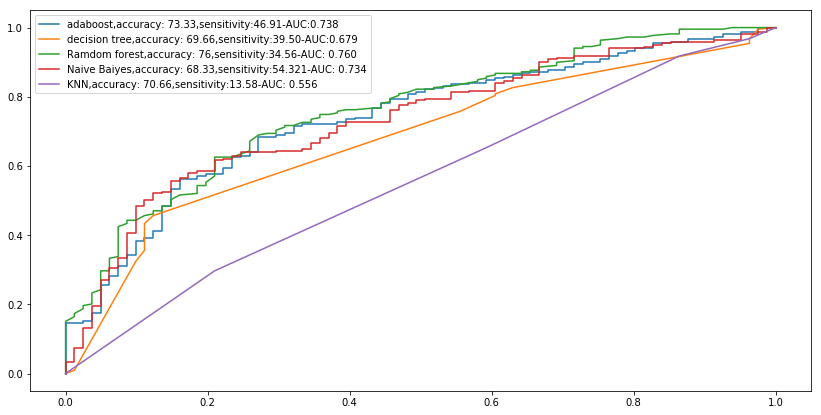

In [100]:
plt.figure(figsize=(14,7))
auc_adaboost=auc(fpr_ab,tpr_ab)
auc_dt=auc(fpr_dt,tpr_dt)
auc_rf=auc(fpr_rf,tpr_rf)
auc_nb=auc(fpr_nb,tpr_nb)
auc_kn=auc(fpr_kn,tpr_kn)
           
plt.plot(fpr_ab,tpr_ab)
plt.plot(fpr_dt,tpr_dt)
plt.plot(fpr_rf,tpr_rf)
plt.plot(fpr_nb,tpr_nb)
plt.plot(fpr_kn,tpr_kn)
plt.legend(['adaboost,accuracy: 73.33,sensitivity:46.91-AUC:%.3f'%auc_adaboost,
           'decision tree,accuracy: 69.66,sensitivity:39.50-AUC:%.3f'%auc_dt,
           'Ramdom forest,accuracy: 76,sensitivity:34.56-AUC: %.3f'%auc_rf,
           'Naive Baiyes,accuracy: 68.33,sensitivity:54.321-AUC: %.3f'%auc_nb,
           'KNN,accuracy: 70.66,sensitivity:13.58-AUC: %.3f'%auc_kn])
plt.show()


In [86]:
model_info

,Decision Tree,Random Forest,AdaBoost,KNN,Naive Bayes
Accuracy,69.6667,76,73.3333,70.6667,68.3333
Sensitivity,39.5062,34.5679,46.9136,13.5802,54.321


#### By the analysis done above, one can choose the KNN cause of its high accuracy and low sensitivty compared to the other model which was made and also by intrepreting the ROC curve we can say KNN model is the best choice among all models.